<a href="https://colab.research.google.com/github/RobBurnap/Bioinformatics-MICR4203-MICR5203/blob/main/notebooks/05_Gene_Expression/01_Clustering_and_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# L05 — RNA-seq Data Overview  
**BIOINFO4/5203 – Gene Expression Module**

### Goals for Today
- Mount Google Drive and set up course folders  
- Load processed RNA-seq data (`GSE104203_Natural_light_RNAseq_processed.xls`)  
- Inspect dataset structure (genes × samples)  
- Explore summary statistics and simple visualizations  
- Save all outputs to your `Outputs/` folder  

**Deliverables**
1. Executed notebook (`.ipynb`)  
2. PDF export with visible plots and tables

In [6]:
!pip install pandas numpy seaborn matplotlib openpyxl -q

from google.colab import drive
drive.mount('/content/drive')

import os, pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
sns.set(style="whitegrid", context="talk")

print("✅ Environment ready.")

Mounted at /content/drive
✅ Environment ready.


## A. Mount Google Drive and Define Course Folders
Edit only the `LECTURE_CODE` and `TOPIC` fields below if needed.  
All inputs will reside under `Data/LECTURE_TOPIC` and outputs under `Outputs/LECTURE_TOPIC`.

In [7]:
COURSE_DIR = "/content/drive/MyDrive/Teaching/BIOINFO4-5203-F25"
LECTURE_CODE = "L05"
TOPIC = "Gene_Expression"

DATA_DIR = f"{COURSE_DIR}/Data/{LECTURE_CODE}_{TOPIC}"
OUTPUT_DIR = f"{COURSE_DIR}/Outputs/{LECTURE_CODE}_{TOPIC}"

for p in [f"{COURSE_DIR}/Outputs", f"{COURSE_DIR}/Notebooks", DATA_DIR, OUTPUT_DIR]:
    os.makedirs(p, exist_ok=True)

print("📂 COURSE_DIR :", COURSE_DIR)
print("📁 DATA_DIR   :", DATA_DIR)
print("📁 OUTPUT_DIR :", OUTPUT_DIR)

📂 COURSE_DIR : /content/drive/MyDrive/Teaching/BIOINFO4-5203-F25
📁 DATA_DIR   : /content/drive/MyDrive/Teaching/BIOINFO4-5203-F25/Data/L05_Gene_Expression
📁 OUTPUT_DIR : /content/drive/MyDrive/Teaching/BIOINFO4-5203-F25/Outputs/L05_Gene_Expression


## B. Load Processed RNA-seq Expression Data
The dataset originates from a natural-light RNA-seq experiment.  
We’ll load it directly from your Drive data folder.

In [13]:
# ================================================
# B. Load Processed RNA-seq Expression Data
# ================================================

import pandas as pd
import numpy as np

# Path to the RNA-seq data (clean version)
data_path = f"{DATA_DIR}/GSE104203_Natural_light_RNAseq_processed.csv"

# Load the dataset
df = pd.read_csv(data_path)

# Basic diagnostics
print(f"✅ Data loaded successfully: {df.shape[0]} genes × {df.shape[1]} columns\n")

# Preview the first few rows
display(df.head())

# Display basic column and type information
print("\n🧾 Column names (first 10):")
print(df.columns[:10].tolist())

print("\n📊 Data types summary:")
print(df.dtypes.value_counts())

# Check for missing values
missing = df.isna().sum().sum()
if missing > 0:
    print(f"\n⚠️ Missing values detected: {missing:,}")
else:
    print("\n✅ No missing values detected.")

# Quick descriptive summary
print("\n📈 Numerical summary (first 5 columns):")
display(df.describe().iloc[:, :5])
df.head()

✅ Data loaded successfully: 2723 genes × 62 columns



,Gene ID,JGI ID,0.5,2,4,6,8,9,10,12,...,9.25.2,9.5.2,10.6,8.8,8.25.3,8.5.3,9.8,9.25.3,9.5.3,10.7
0,Synpcc7942_0001,637798406,1.29,1.23,1.73,1.23,1.72,1.51,1.63,1.42,...,-0.22,0.00,0.07,-0.29,-0.45,-0.59,-0.31,-0.23,-0.18,0.05
1,Synpcc7942_0002,637798407,0.66,0.36,0.49,0.39,0.39,0.42,0.67,0.52,...,-0.35,-0.28,0.11,-0.18,-0.73,-0.41,0.15,0.13,0.32,0.34
2,Synpcc7942_0003,637798408,0.52,0.80,0.51,0.55,0.62,0.67,0.63,0.65,...,-0.03,-0.08,-0.07,0.08,0.02,-0.42,-0.33,-0.48,-0.03,-0.01
3,Synpcc7942_0004,637798409,1.90,2.39,1.41,1.13,0.95,0.87,0.84,0.69,...,-0.81,-1.22,-1.12,-0.47,-0.68,-0.99,-0.90,-1.18,-0.84,-0.90
4,Synpcc7942_0005,637798410,0.12,0.06,0.17,0.17,0.32,0.24,0.22,0.20,...,1.36,1.47,0.89,0.57,1.01,1.23,1.07,0.95,0.67,0.67



🧾 Column names (first 10):
['Gene ID', 'JGI ID', '0.5', '2', '4', '6', '8', '9', '10', '12']

📊 Data types summary:
float64    60
object      1
int64       1
Name: count, dtype: int64

⚠️ Missing values detected: 1,474

📈 Numerical summary (first 5 columns):


,JGI ID,0.5,2,4,6
count,2.723000e+03,2723.000000,2723.000000,2723.000000,2723.000000
mean,6.359826e+08,1.653628,2.366805,2.218593,2.060364
std,3.453143e+07,20.322389,28.544907,29.717443,26.131203
min,1.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,6.377990e+08,0.160000,0.140000,0.160000,0.180000
50%,6.377997e+08,0.350000,0.340000,0.360000,0.370000
75%,6.378004e+08,0.830000,0.875000,0.900000,0.890000
max,6.407111e+08,1047.470000,1447.120000,1513.830000,1328.060000


,Gene ID,JGI ID,0.5,2,4,6,8,9,10,12,...,9.25.2,9.5.2,10.6,8.8,8.25.3,8.5.3,9.8,9.25.3,9.5.3,10.7
0,Synpcc7942_0001,637798406,1.29,1.23,1.73,1.23,1.72,1.51,1.63,1.42,...,-0.22,0.00,0.07,-0.29,-0.45,-0.59,-0.31,-0.23,-0.18,0.05
1,Synpcc7942_0002,637798407,0.66,0.36,0.49,0.39,0.39,0.42,0.67,0.52,...,-0.35,-0.28,0.11,-0.18,-0.73,-0.41,0.15,0.13,0.32,0.34
2,Synpcc7942_0003,637798408,0.52,0.80,0.51,0.55,0.62,0.67,0.63,0.65,...,-0.03,-0.08,-0.07,0.08,0.02,-0.42,-0.33,-0.48,-0.03,-0.01
3,Synpcc7942_0004,637798409,1.90,2.39,1.41,1.13,0.95,0.87,0.84,0.69,...,-0.81,-1.22,-1.12,-0.47,-0.68,-0.99,-0.90,-1.18,-0.84,-0.90
4,Synpcc7942_0005,637798410,0.12,0.06,0.17,0.17,0.32,0.24,0.22,0.20,...,1.36,1.47,0.89,0.57,1.01,1.23,1.07,0.95,0.67,0.67


### C. Inspect and Prepare Expression Data
Now that the RNA-seq dataset is loaded, we’ll identify which columns correspond to
gene identifiers (metadata) and which represent **numeric expression measurements**.
We'll then create a clean numeric matrix for analysis and verify that all expression
values are valid (no NaNs or infinite values).

In [16]:
# Identify metadata and numeric expression columns
metadata_cols = ['Gene ID', 'JGI ID']  # adjust if names differ
expr_cols = [c for c in df.columns if c not in metadata_cols]

# Extract matrices
meta_df = df[metadata_cols]
expr_df = df[expr_cols].copy()

# Ensure numeric
expr_df = expr_df.apply(pd.to_numeric, errors='coerce')

# Check for any remaining issues
print(f"🧬 Expression matrix shape: {expr_df.shape}")

# Replace infinite values with NaN before imputation
expr_df.replace([np.inf, -np.inf], np.nan, inplace=True)

print(f"Missing values (after converting inf to NaN): {expr_df.isna().sum().sum()}")

# Replace missing values (if any) with column means
expr_df = expr_df.fillna(expr_df.mean())

# Sanity-check ranges
print(f"\nMin expression: {expr_df.min().min():.3f}")
print(f"Max expression: {expr_df.max().max():.3f}")

display(expr_df.head())

🧬 Expression matrix shape: (2723, 60)
Missing values (after converting inf to NaN): 1482

Min expression: -9.590
Max expression: 1785.000


,0.5,2,4,6,8,9,10,12,0.5.1,2.1,...,9.25.2,9.5.2,10.6,8.8,8.25.3,8.5.3,9.8,9.25.3,9.5.3,10.7
0,1.29,1.23,1.73,1.23,1.72,1.51,1.63,1.42,1.35,1.43,...,-0.22,0.00,0.07,-0.29,-0.45,-0.59,-0.31,-0.23,-0.18,0.05
1,0.66,0.36,0.49,0.39,0.39,0.42,0.67,0.52,0.57,0.51,...,-0.35,-0.28,0.11,-0.18,-0.73,-0.41,0.15,0.13,0.32,0.34
2,0.52,0.80,0.51,0.55,0.62,0.67,0.63,0.65,0.54,0.73,...,-0.03,-0.08,-0.07,0.08,0.02,-0.42,-0.33,-0.48,-0.03,-0.01
3,1.90,2.39,1.41,1.13,0.95,0.87,0.84,0.69,1.97,2.12,...,-0.81,-1.22,-1.12,-0.47,-0.68,-0.99,-0.90,-1.18,-0.84,-0.90
4,0.12,0.06,0.17,0.17,0.32,0.24,0.22,0.20,0.14,0.06,...,1.36,1.47,0.89,0.57,1.01,1.23,1.07,0.95,0.67,0.67


### D. Log₂ Transformation and Standardization
RNA-seq data typically span several orders of magnitude. To make variance comparable
across genes, we’ll apply a **log₂(x + 1)** transformation and then **standardize**
each feature (gene) to mean = 0, SD = 1.  
This ensures that PCA and clustering reflect relative changes rather than absolute
expression levels.

In [19]:
# ================================================
# D. Log₂ Transformation and Standardization (Safe)
# ================================================

from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# 1️⃣ Apply log2(x + 1) transform
expr_log = np.log2(expr_df + 1)

# 2️⃣ Replace any problematic values (inf, -inf, NaN)
expr_log.replace([np.inf, -np.inf], np.nan, inplace=True)
expr_log = expr_log.fillna(expr_log.median())

# Verify no invalid values remain
invalids = np.isinf(expr_log).sum().sum() + expr_log.isna().sum().sum()
print(f"✅ Cleaned log₂ data — invalid values remaining: {invalids}")

# 3️⃣ Standardize across genes (rows)
scaler = StandardScaler()
expr_scaled = pd.DataFrame(
    scaler.fit_transform(expr_log.T).T,
    index=expr_log.index,
    columns=expr_log.columns
)

# 4️⃣ Inspect transformation result
print(f"✅ Data transformed: log₂ + standardized")
print(f"Range: {expr_scaled.min().min():.2f} → {expr_scaled.max().max():.2f}")
display(expr_scaled.iloc[:5, :5])

✅ Cleaned log₂ data — invalid values remaining: 0
✅ Data transformed: log₂ + standardized
Range: -7.31 → 4.72


/usr/local/lib/python3.12/dist-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log2
  result = func(self.values, **kwargs)
/usr/local/lib/python3.12/dist-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: invalid value encountered in log2
  result = func(self.values, **kwargs)


,0.5,2,4,6,8
0,0.890816,0.841983,1.214070,0.841983,1.207321
1,0.992523,0.533520,0.743736,0.583762,0.583762
2,0.623885,1.150758,0.603316,0.684790,0.822435
3,0.985020,1.119817,0.825216,0.718579,0.642346
4,-0.460869,-0.634256,-0.323333,-0.323333,0.056532


# ================================================
# D. Log₂ Transformation and Standardization (Safe)
# ================================================

from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# 1️⃣ Apply log2(x + 1) transform
expr_log = np.log2(expr_df + 1)

# 2️⃣ Replace any problematic values (inf, -inf, NaN)
expr_log.replace([np.inf, -np.inf], np.nan, inplace=True)
expr_log = expr_log.fillna(expr_log.median())

# Verify no invalid values remain
invalids = np.isinf(expr_log).sum().sum() + expr_log.isna().sum().sum()
print(f"✅ Cleaned log₂ data — invalid values remaining: {invalids}")

# 3️⃣ Standardize across genes (rows)
scaler = StandardScaler()
expr_scaled = pd.DataFrame(
    scaler.fit_transform(expr_log.T).T,
    index=expr_log.index,
    columns=expr_log.columns
)

# 4️⃣ Inspect transformation result
print(f"✅ Data transformed: log₂ + standardized")
print(f"Range: {expr_scaled.min().min():.2f} → {expr_scaled.max().max():.2f}")
display(expr_scaled.iloc[:5, :5])

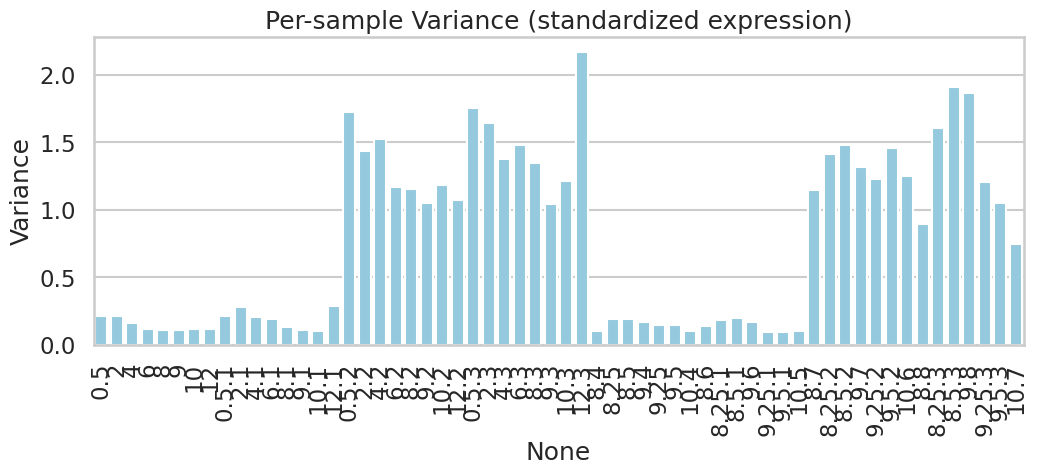

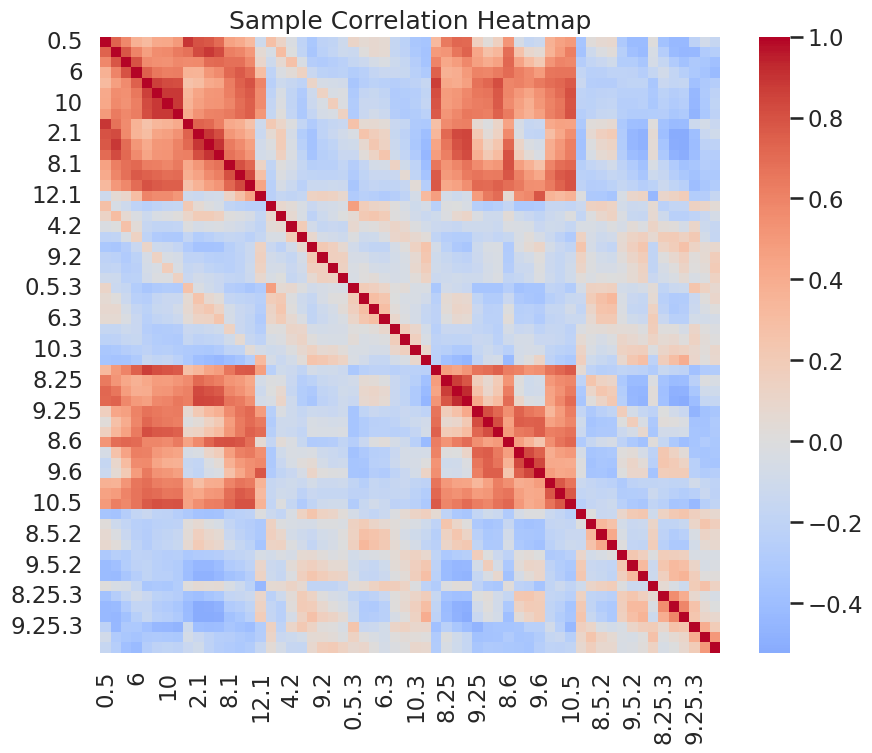

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣  Sample variance
sample_var = expr_scaled.var(axis=0)

plt.figure(figsize=(12,4))
sns.barplot(x=sample_var.index, y=sample_var.values, color='skyblue')
plt.xticks(rotation=90)
plt.ylabel('Variance')
plt.title('Per-sample Variance (standardized expression)')
plt.show()

# 2️⃣  Correlation heatmap
corr = expr_scaled.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='coolwarm', center=0, annot=False)
plt.title('Sample Correlation Heatmap')
plt.show()